# Pillow open/resize/crop/thumb

In [28]:
from PIL import Image

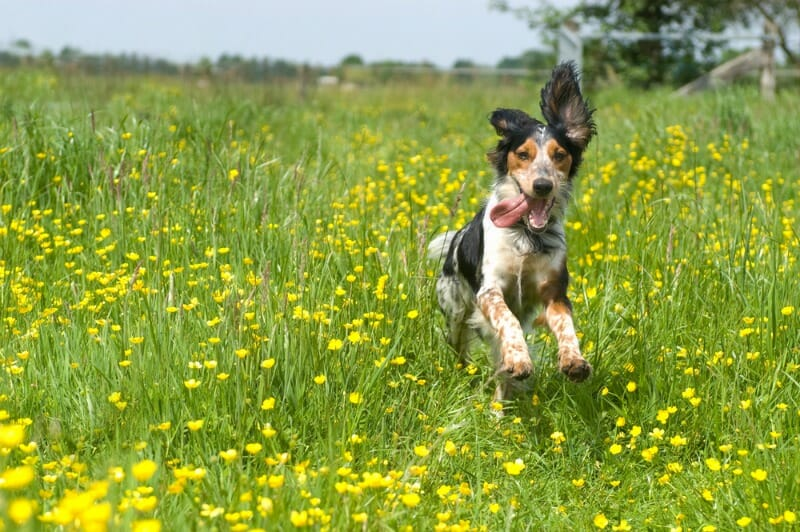

In [29]:
doggy = Image.open("img/dog-running.jpg")
doggy

In [30]:
doggy.size

(800, 532)

In [31]:
new_size = (doggy.size[0]//3, doggy.size[1]//2)
new_size

(266, 266)

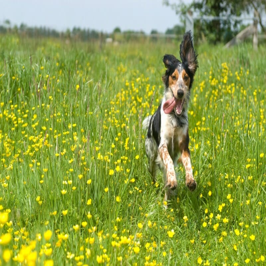

In [32]:
slim_doggy = doggy.resize(new_size)
slim_doggy

In [33]:
slim_doggy.save('img/slim-dog-running.jpg')

In [34]:
left_x = doggy.size[0] - doggy.size[0]//3*2
left_y = 0
right_x = doggy.size[0] - 32
right_y = doggy.size[1] - 32
crop_box = (left_x, left_y, right_x, right_y)
print(crop_box)

(268, 0, 768, 500)


(500, 500)


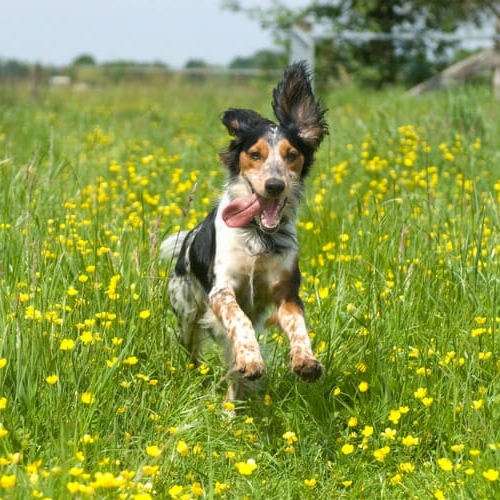

In [35]:
boxed_doggy = doggy.crop(crop_box)
print(boxed_doggy.size)
boxed_doggy

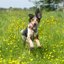

In [36]:
thumb_doggy = boxed_doggy.copy()
thumb_size = 64, 64
thumb_doggy.thumbnail(thumb_size)
thumb_doggy

## Pixel arrays

In [46]:
doggy_r, doggy_g, doggy_b = doggy.split()

In [67]:
doggy.mode

'RGB'

In [68]:
doggy_r.mode

'L'

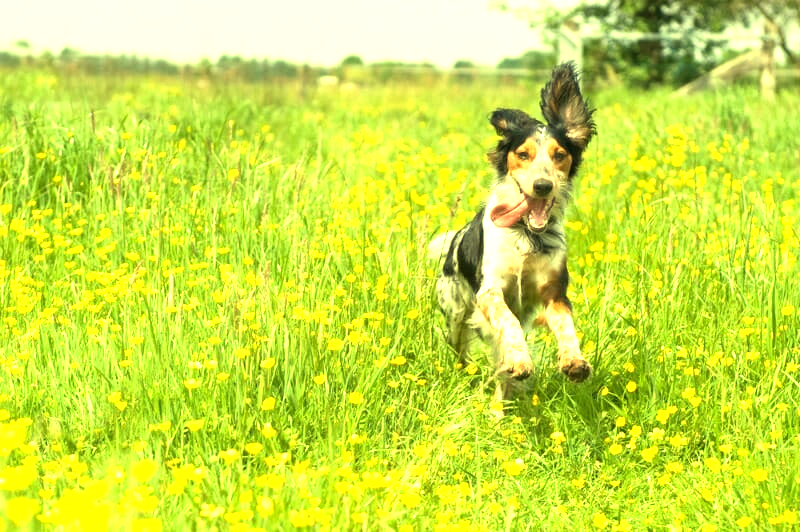

In [55]:
doggy_r = doggy_r.point(lambda red: red * 1.05)
doggy_g = doggy_g.point(lambda green: green * 1.05)
desaturated_doggy = Image.merge("RGB", (doggy_r, doggy_g, doggy_b))
desaturated_doggy

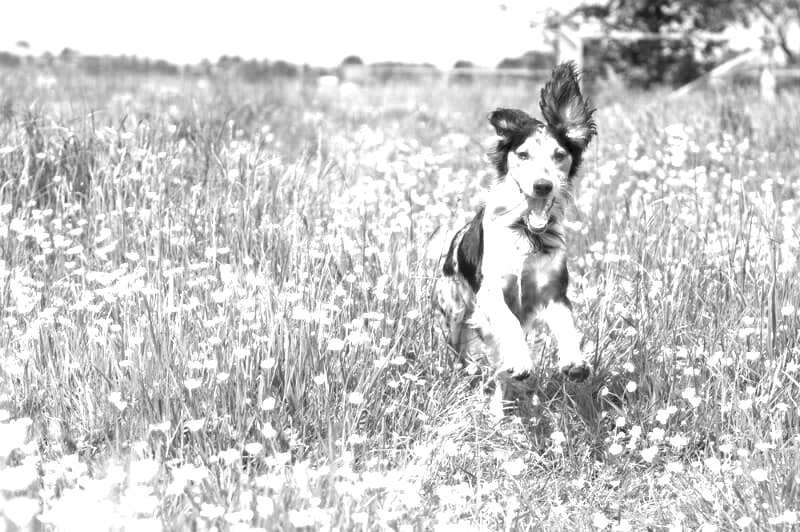

In [57]:
doggy_r

In [66]:
doggy_reds = thumb_doggy.getdata(0)
doggy_greens = thumb_doggy.getdata(1)
doggy_blues = thumb_doggy.getdata(2)
for id, red in enumerate(list(doggy_reds)):
    print(id, doggy_reds[id], doggy_greens[id], doggy_blues[id])
# list(doggy_reds)

0 212 224 238
1 212 224 238
2 212 224 238
3 212 224 238
4 212 224 238
5 211 225 238
6 211 225 238
7 212 224 238
8 212 224 238
9 212 224 238
10 212 224 238
11 211 225 238
12 212 226 239
13 213 225 239
14 213 225 239
15 212 226 239
16 212 226 239
17 213 227 239
18 213 227 239
19 212 226 239
20 213 227 240
21 213 227 239
22 213 226 241
23 213 227 240
24 212 226 239
25 212 226 239
26 213 227 240
27 211 225 236
28 189 205 206
29 163 181 179
30 170 188 192
31 208 221 235
32 206 219 230
33 208 222 234
34 199 214 224
35 179 195 198
36 191 207 213
37 209 224 236
38 206 221 233
39 174 193 188
40 131 149 137
41 132 148 149
42 130 148 147
43 113 132 125
44 106 120 114
45 70 88 42
46 80 102 44
47 81 99 54
48 45 57 26
49 34 44 21
50 50 63 44
51 85 97 87
52 99 111 99
53 63 75 48
54 70 84 53
55 58 72 38
56 44 59 30
57 52 65 39
58 61 70 41
59 81 85 55
60 98 101 76
61 76 82 58
62 80 86 64
63 107 111 102
64 211 223 237
65 211 223 237
66 211 223 237
67 211 223 237
68 211 223 237
69 210 224 237
70 210 224 

In [69]:
from PIL import ImageFilter

In [75]:
from PIL import ImageOps

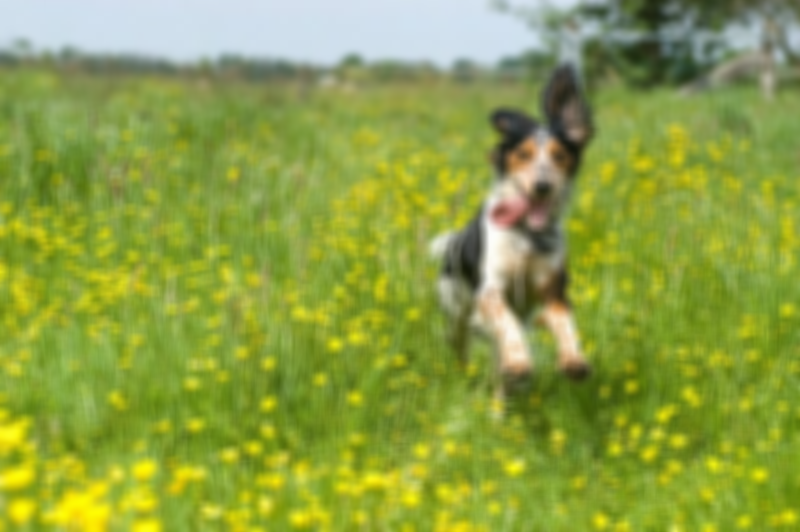

In [73]:
hazy_doggy = doggy.filter(ImageFilter.BoxBlur(5))
hazy_doggy

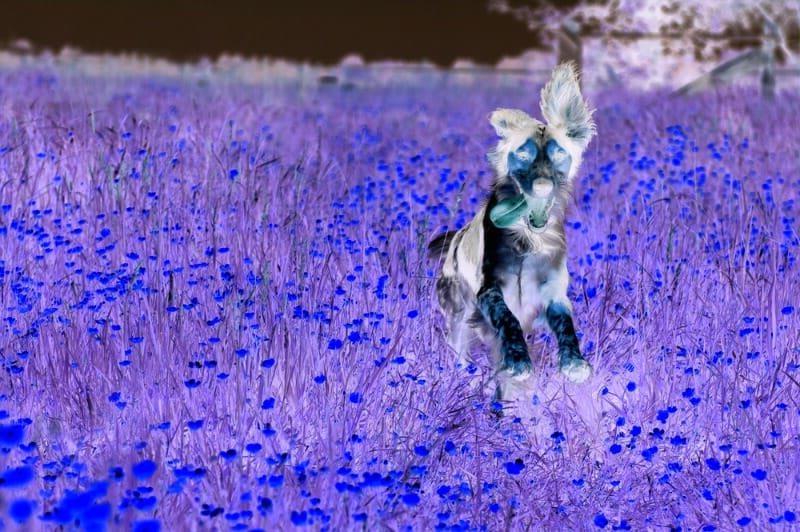

In [76]:
ImageOps.invert(doggy)

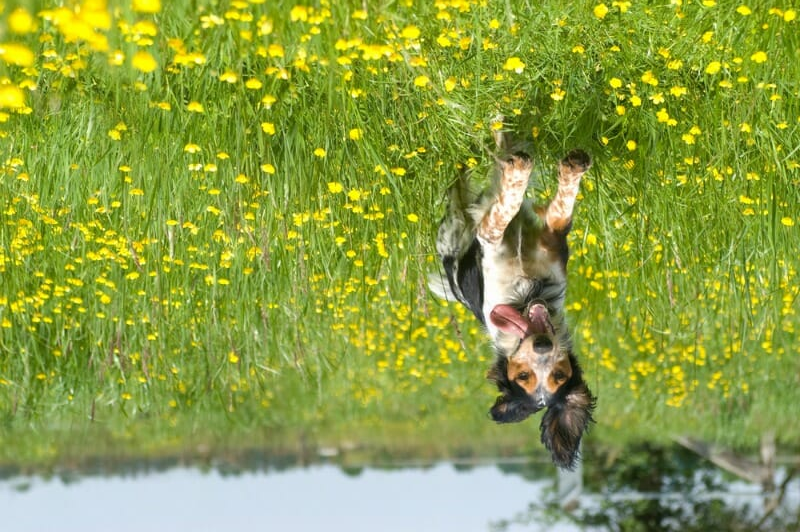

In [77]:
ImageOps.flip(doggy)

In [84]:
box_left = 0, 0, 400, 532
doggy_left = ImageOps.mirror(doggy).crop(box_left)
# box_right = 400, 0, 800, 532
# doggy_right = doggy.crop(box_right)

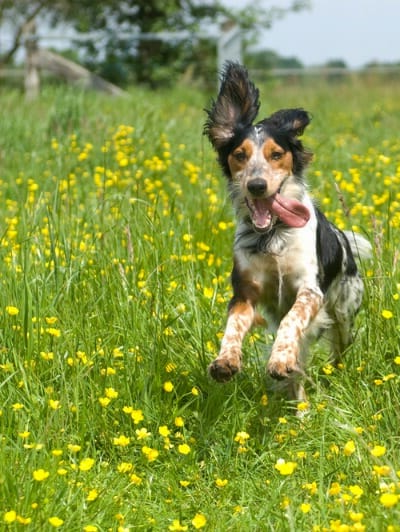

In [85]:
doggy_left

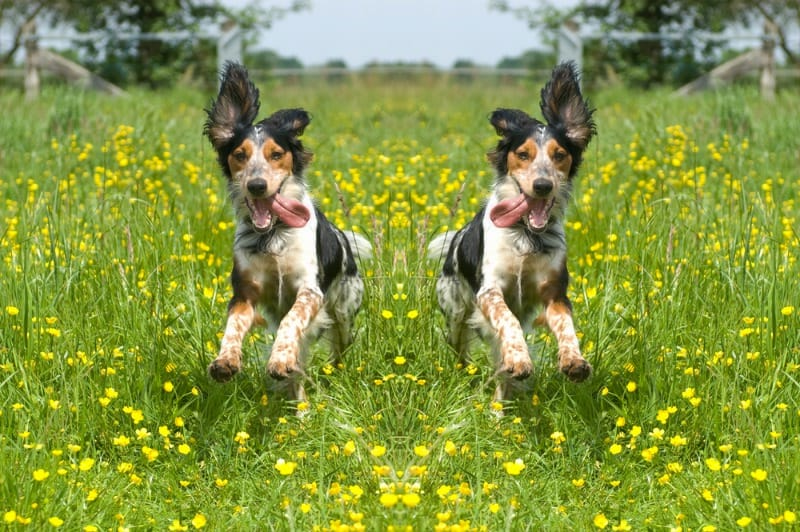

In [86]:
double_doggy = doggy.copy()
double_doggy.paste(doggy_left, (0, 0))
double_doggy

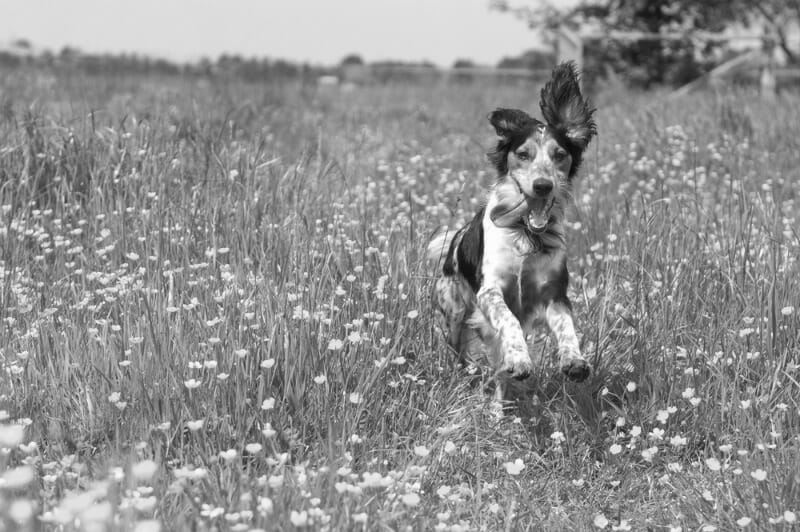

In [87]:
doggy_bw = doggy.convert('L')
doggy_bw